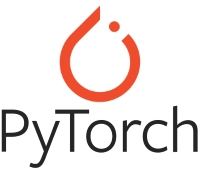SEQUENTIAL

In [15]:
import torch
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<h3>Data reshaping and sampling<h3>

In [16]:
df=pd.read_csv("breast-cancer-wisconsin.csv",sep=';')
#display(df.head())
#print(len(df))       
        
for i in range(0,len(df)):
    if df.iat[i, 10]==2:
        df.iat[i,10]=0
    else:
        df.iat[i,10]=1
        
for i in range(0,len(df)):
    if df.iat[i, 10] !=1 and df.iat[i, 10] !=0:
        print(df.iloc[i,10])

ytrain=df["Column11"].to_numpy()

df=df.drop(["Column7"],axis=1)

xtrain=df.to_numpy()

sc=StandardScaler()
Ztrain=sc.fit_transform(xtrain)


from sklearn.utils import shuffle
Ztrain,ytrain = shuffle(Ztrain,ytrain, random_state=0)


from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(Ztrain,ytrain, test_size=0.2, random_state=42)

tensor_ZTrain = torch.FloatTensor(feature_train) 

tensor_yTrain = torch.FloatTensor(target_train) 

<h3> Model building<h3>

In [17]:
"""
Model Sequential :
"""
 
mon_modele = torch.nn.Sequential(
    torch.nn.Linear(10, 2),
    torch.nn.ReLU(),
    torch.nn.Linear(2, 1),
    torch.nn.Sigmoid())

In [18]:
"""
fonction critère à optimiser (Mean Squarred Error) et optimiser : Adam
"""
fonction_de_cout= torch.nn.MSELoss() 
 
optimiseur = torch.optim.Adam(mon_modele.parameters()) 

<h3> Model training<h3>

In [19]:
def train_session(X,y,classifier,criterion,optimizer,n_epochs=10000): 
    
    #pour collecter le loss au fil des itérations     
    losses = np.zeros(n_epochs)     #itérer (boucle) pour optimiser     
    
    for iter in range(n_epochs): 
    
        #réinitialiser (ràz) le gradient 
        #nécessaire à chaque passage sinon PyTorch accumule         
        optimizer.zero_grad() 
    
        #calculer la sortie du réseau         
        yPred = classifier(X)         
    
        #calculer la perte         
        perte = criterion(yPred.squeeze(),y) 
    
        #la collecter         
        losses[iter] = perte.item() 
    
        #calcul du gradient (et retropropagation)         
        perte.backward() 
        
        #màj des poids synaptiques         
        optimizer.step()    
    
    #sortie de la boucle     
    return losses

pertes = train_session(tensor_ZTrain,tensor_yTrain,mon_modele,fonction_de_cout,optimiseur)

<h3> Model evaluation<h3>

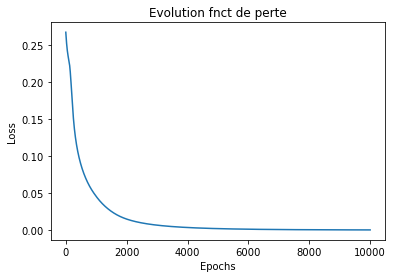

In [20]:
import matplotlib.pyplot as plt 
plt.plot(np.arange(0,pertes.shape[0]),pertes) 
plt.title("Evolution fnct de perte") 
plt.xlabel("Epochs") 
plt.ylabel("Loss") 
plt.show() 

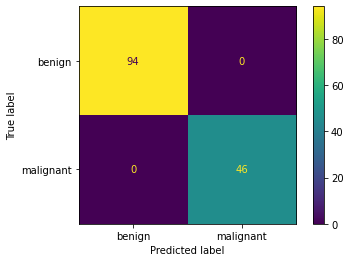

In [21]:
tensor_ZTest = torch.FloatTensor(feature_test) 

resultat = np.round(mon_modele(tensor_ZTest).squeeze().detach().numpy(),0)
cm = confusion_matrix(target_test,resultat)
class_names=["benign","malignant"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot()